<a href="https://colab.research.google.com/github/tanupat085/SuperAi/blob/main/thainumb%20image%20class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os

In [ ]:
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

import matplotlib.image as mpimg
from PIL import Image
from PIL import ImageEnhance

import skimage.measure

for pc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt install unzip
!apt install file

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmagic-mgc libmagic1
The following NEW packages will be installed:
  file libmagic-mgc libmagic1
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 275 kB of archives.
After this operation, 5,297 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.4 [68.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 file amd64 1:5.32-2ubuntu0.4 [22.1 kB]
Fetched 275 kB in 1s (236 kB/s)
Selecting previ

get dataset from drive

In [ ]:
!unzip -q "/content/drive/My Drive/Ai/thai-mnist-classification.zip"

### Get Data

In [ ]:
import matplotlib.image as mpimg

In [ ]:
df_map = pd.read_csv('mnist.train.map.csv')
df_test_rule = pd.read_csv('test.rules.csv')
df_train_rule = pd.read_csv('train.rules.csv')

In [ ]:
df_reg = pd.merge(df_train_rule.drop('id',axis=1), df_map, how='left', left_on=['feature1'], right_on=['id'])\
            .rename(columns={'category':'feature1_value'}).drop(['id','feature1'],axis=1)

df_reg = pd.merge(df_reg, df_map, how='left', left_on=['feature2'], right_on=['id'])\
            .rename(columns={'category':'feature2_value'}).drop(['id','feature2'],axis=1)

df_reg = pd.merge(df_reg, df_map, how='left', left_on=['feature3'], right_on=['id'])\
            .rename(columns={'category':'feature3_value'}).drop(['id','feature3'],axis=1)

In [ ]:
df_reg

,predict,feature1_value,feature2_value,feature3_value
0,9,NaN,8,1
1,9,NaN,8,1
2,9,NaN,8,1
3,4,NaN,0,4
4,4,NaN,0,4
...,...,...,...,...
5550,0,7.0,3,6
5551,51,9.0,1,7
5552,55,7.0,1,5
5553,67,8.0,8,6


In [ ]:
train_dir = 'train/'

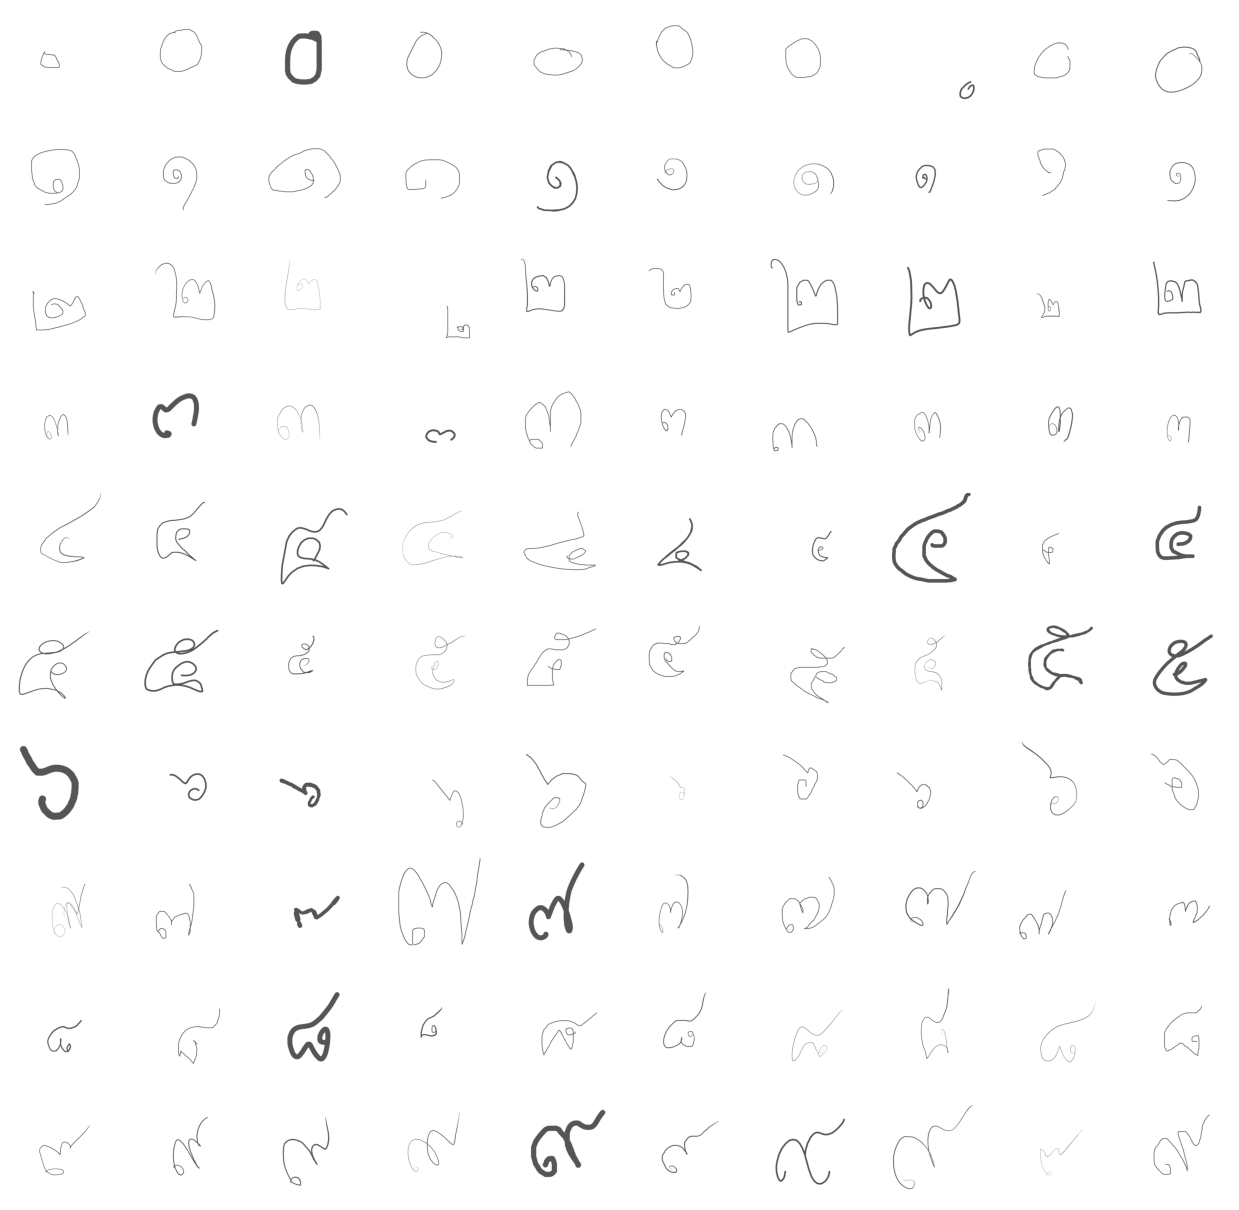

In [ ]:
plt.figure(figsize=(22, 22))

number = 10
img_list = []

for i in range(number):
    temp = list(df_map[df_map['category'] == i]['id'][:10])
    img_list = img_list + temp

for index, file in enumerate(img_list):
    path = os.path.join(train_dir,file)
    plt.subplot(number,len(img_list)/number,index+1)
    img = mpimg.imread(path)
    plt.axis('off')
    plt.imshow(img)

In [ ]:
testimagename = train_dir+'/' + '007ab8c6-bd37-48dd-bff4-6b49b1db61f6.png'
image = Image.open(testimagename)

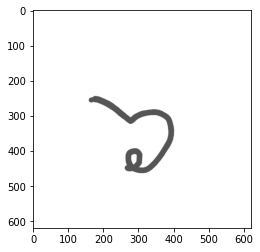

In [ ]:
def img_show(img, figsize=(8, 4)):
  plt.figure(figsize=figsize)
  plt.imshow(img)
  plt.show()

img_show(image)

In [ ]:
from skimage.morphology import convex_hull_image
from PIL.ImageOps import grayscale
from PIL.ImageOps import autocontrast
from PIL import ImageOps
import matplotlib.patches as patches

GrayScale

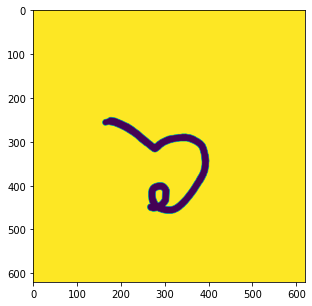

In [ ]:
bw_image = grayscale(image)

img_show(bw_image, figsize=(5, 5))

In [ ]:
bw_image_with_norm = autocontrast(bw_image)

Crop

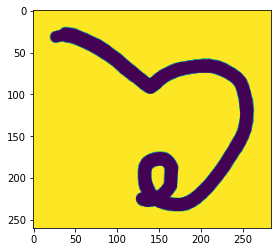

In [ ]:
inv_sample = ImageOps.invert(bw_image_with_norm)
bbox = inv_sample.getbbox()
(left, upper, right, lower) = bbox

pad = 20
image_crop = bw_image_with_norm.crop((left - pad, upper - pad, right + pad, lower + pad))

img_show(image_crop)

Resize

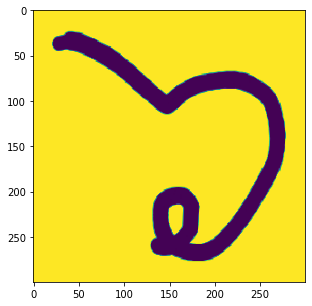

In [ ]:
image_resize = image_crop.resize((300,300), resample=0)

img_show(image_resize, figsize=(5, 5))

Max Pooling

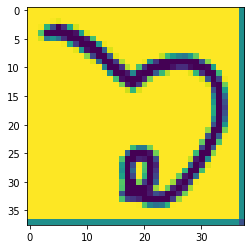

In [ ]:
img_show(skimage.measure.block_reduce(np.array(image_resize), (8,8)))

Change All Image

In [ ]:
import skimage

In [ ]:
target_size = (300,300)

def image_preprocess(image):
    
    padding = 20
    interpolate_value = 0
    max_pooling_kernel_size = (8,8)
    
    # Gray Scale
    image = grayscale(image)
    
    # Normalize
    image = autocontrast(image)
    
    # Crop & Invert
    inv_image = ImageOps.invert(image)
    bbox = inv_image.getbbox()
    (left, upper, right, lower) = bbox
    image = inv_image.crop((left - padding, upper - padding, right + padding, lower + padding))
    
    # Resize
    image = image.resize(target_size, resample=0)
    
    # Maxpooling
    image = skimage.measure.block_reduce(np.array(image), (8,8), np.max)
    
    return image

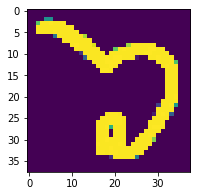

In [ ]:
img_show(image_preprocess(image), figsize=(3, 3))

train test split

In [ ]:
X = df_map['id']
y = df_map['category']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=20)

In [ ]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_train_cat.shape

(6191, 10)

In [ ]:
y_val_cat = tf.keras.utils.to_categorical(y_val)
y_val_cat.shape

(2064, 10)

# **Image Preprocessing**

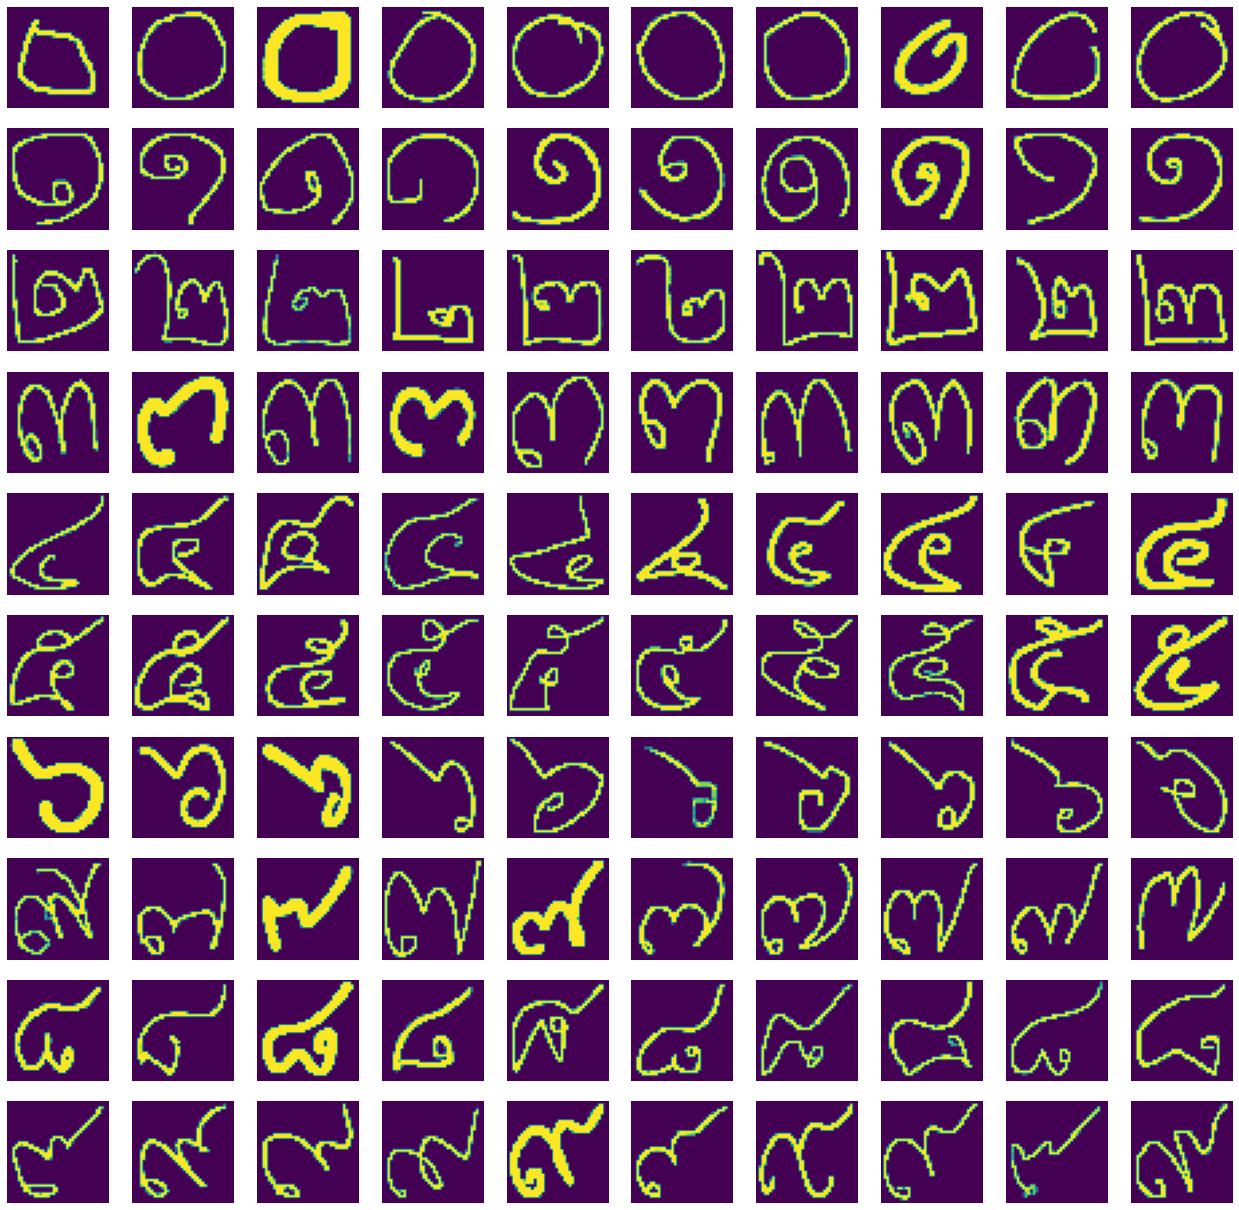

In [ ]:
plt.figure(figsize=(22, 22))

number = 10
img_list = []

for i in range(number):
    temp = list(df_map[df_map['category'] == i]['id'][:10])
    img_list = img_list + temp

for index, file in enumerate(img_list):
    path = os.path.join(train_dir,file)
    plt.subplot(number,len(img_list)/number,index+1)
    image = Image.open(path)
    img = image_preprocess(image)
    plt.axis('off')
    plt.imshow(img)

In [ ]:
X_train_img = []
y_train_label = []

X_val_img = []
y_val_label = []

for index,value in enumerate(X_train.index.values):
    temp = Image.open(os.path.join(train_dir, X_train[value]))
    temp = image_preprocess(temp)
    temp = np.array(temp)
    X_train_img.append(temp)
    
    temp_label = y_train_cat[index]
    y_train_label.append(temp_label)

    
for index,value in enumerate(X_val.index.values):
    temp = Image.open(os.path.join(train_dir, X_val[value]))
    temp = image_preprocess(temp)
    temp = np.array(temp)
    X_val_img.append(temp)
    
    temp_label = y_val_cat[index]
    y_val_label.append(temp_label)

X_train_img = np.array(X_train_img)
X_val_img = np.array(X_val_img)

y_train_label = np.array(y_train_label)
y_val_label = np.array(y_val_label)

In [ ]:
print(f'Images in training set: {len(X_train_img)} ')
print(f'Images in validation set: {len(X_val_img)} ')

print(f'Labels in training set: {len(y_train_label)} ')
print(f'Labels in validation set: {len(y_val_label)} ')

Images in training set: 6191 
Images in validation set: 2064 
Labels in training set: 6191 
Labels in validation set: 2064 


In [ ]:
print(f'X_train_img: {X_train_img.shape}')
print(f'X_val_img: {X_val_img.shape}')
print(f'y_train_label: {y_train_label.shape}')
print(f'y_val_label: {y_val_label.shape}')

X_train_img: (6191, 38, 38)
X_val_img: (2064, 38, 38)
y_train_label: (6191, 10)
y_val_label: (2064, 10)


# Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=15,
      fill_mode = 'nearest'
        )

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 32

train_generator = train_datagen.flow(X_train_img[:,:,:,None], y_train_label, \
                batch_size=batch_size)

validation_generator = validation_datagen.flow(X_val_img[:,:,:,None], y_val_label, \
                batch_size=batch_size)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
epochs = 35
lrs = 0.001

In [ ]:
loss = CategoricalCrossentropy(label_smoothing=1./10)

In [ ]:
def scheduler(epoch, lr):
    if epoch < 8:
        return lr
    else:
        return lr * tf.math.exp(0.1 * (10 - epoch))
    
lrs_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)

In [ ]:
es_callback = EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3

pre_trained_model = EfficientNetB3(
    include_top=False, weights=None, input_tensor=None, input_shape=(38, 38, 1))

for layer in pre_trained_model.layers:
    layer.trainable = True

#pre_trained_model.summary()

In [ ]:
last_layer = pre_trained_model.get_layer('block3a_activation') # EfficientNetB3

print('last layer output shape: ', last_layer.output_shape)

last_output = last_layer.output

print(pre_trained_model.input)
print(last_output)

last layer output shape:  (None, 5, 5, 192)
Tensor("input_1:0", shape=(None, 38, 38, 1), dtype=float32)
Tensor("block3a_activation/IdentityN:0", shape=(None, 5, 5, 192), dtype=float32)


In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = Model(pre_trained_model.input, x) 

In [ ]:
model.compile(optimizer = opt, 
              loss = loss, 
              metrics = ['acc'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch = len(X_train_img)//batch_size ,
      epochs=epochs,
      verbose=1,
      validation_data = validation_generator,
      validation_steps = len(X_val_img)//batch_size ,
      callbacks=[es_callback, lrs_callback])

Epoch 1/35
193/193 [==============================] - 49s 252ms/step - loss: 1.5740 - acc: 0.5548 - val_loss: 2.3799 - val_acc: 0.0806
Epoch 2/35
193/193 [==============================] - 50s 258ms/step - loss: 0.9774 - acc: 0.8290 - val_loss: 2.3878 - val_acc: 0.0864
Epoch 3/35
193/193 [==============================] - 48s 247ms/step - loss: 0.8632 - acc: 0.8868 - val_loss: 1.9224 - val_acc: 0.3823
Epoch 4/35
193/193 [==============================] - 48s 247ms/step - loss: 0.8010 - acc: 0.9112 - val_loss: 0.8584 - val_acc: 0.8901
Epoch 5/35
193/193 [==============================] - 48s 246ms/step - loss: 0.7638 - acc: 0.9261 - val_loss: 0.7727 - val_acc: 0.9111
Epoch 6/35
193/193 [==============================] - 48s 248ms/step - loss: 0.7316 - acc: 0.9375 - val_loss: 0.7984 - val_acc: 0.9004
Epoch 7/35
193/193 [==============================] - 48s 246ms/step - loss: 0.7094 - acc: 0.9456 - val_loss: 0.7495 - val_acc: 0.9253
Epoch 8/35
193/193 [==============================] - 4

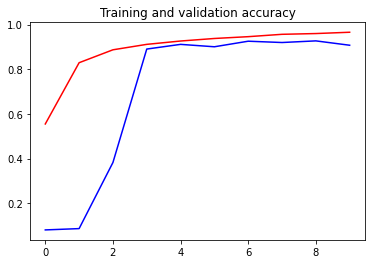

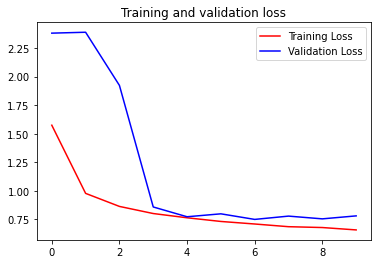

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
y_pred_train = []

for image in X_train:
    x = Image.open(os.path.join(train_dir, image))
    x = np.array(image_preprocess(x))
    x = np.expand_dims(x, axis=0)
    x = np.vstack([x])/255.
    classes = model.predict(x)
    y_pred_train.append(np.argmax(classes, axis = 1))

In [ ]:
y_pred_val = []

for image in X_val:
    x = Image.open(os.path.join(train_dir, image))
    x = np.array(image_preprocess(x))
    x = np.expand_dims(x, axis=0)
    x = np.vstack([x])/255.
    classes = model.predict(x)
    y_pred_val.append(np.argmax(classes, axis = 1))

# Rules Model

Explore

Feature 1

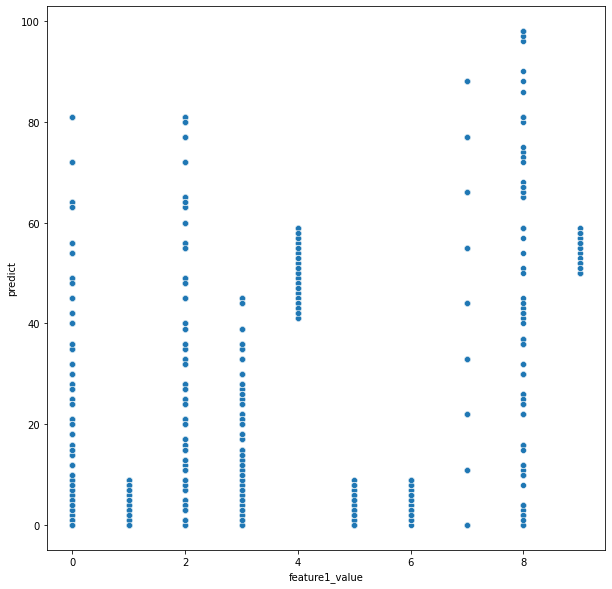

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = df_reg, x='feature1_value', y='predict')

In [ ]:
df_reg['feature1_value'] = df_reg['feature1_value'].fillna(10)
df_reg['feature1_value'].value_counts()

0.0     1620
1.0     1043
2.0      729
3.0      621
4.0      430
5.0      318
10.0     284
6.0      235
7.0      154
8.0       91
9.0       30
Name: feature1_value, dtype: int64

Feature 2

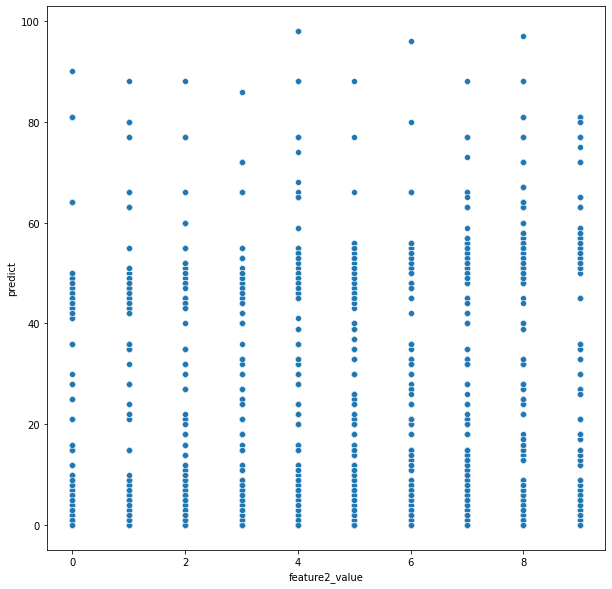

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = df_reg, x='feature2_value', y='predict')

Feature 3

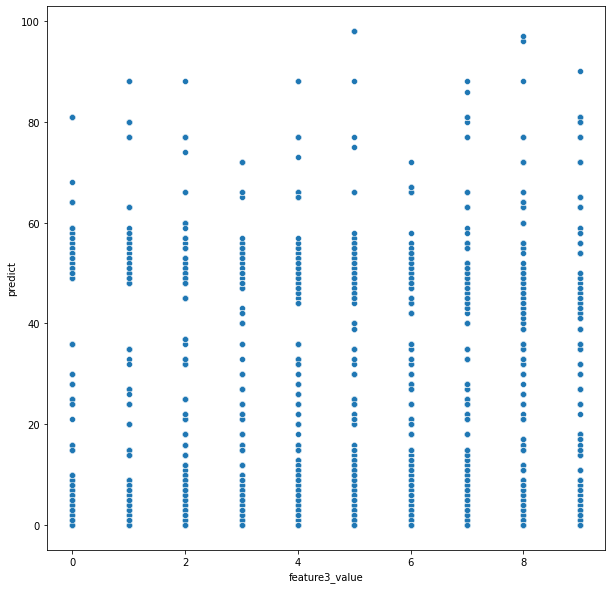

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = df_reg, x='feature3_value', y='predict')

In [ ]:
!pip install pycaret -q

In [ ]:
from pycaret.regression import *

With Feature 1

In [ ]:
df_regressor = df_reg

In [ ]:
df_regressor['predict'].value_counts()

0     645
1     345
3     319
2     291
4     252
5     250
8     217
6     215
7     208
9     206
15    171
24    142
36    103
12     91
48     88
21     82
16     80
45     78
18     78
14     76
10     72
49     71
27     68
54     65
56     64
11     63
63     62
20     56
50     56
35     52
13     50
55     49
33     49
28     49
30     49
25     48
53     45
44     42
51     40
32     40
72     35
77     34
80     32
40     31
52     31
64     29
81     29
42     29
47     26
65     25
46     23
66     22
60     22
17     21
22     20
57     20
59     15
39     15
43     13
58     12
26     11
88      8
41      6
67      5
37      3
98      3
97      1
73      1
68      1
74      1
86      1
90      1
96      1
75      1
Name: predict, dtype: int64

In [ ]:
from sklearn.utils.fixes import parse_version

In [ ]:
regressor = setup(data = df_regressor, numeric_features = ['feature1_value','feature2_value','feature3_value'], target = 'predict')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,6155
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(5555, 4)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8951,25.3499,5.0349,0.9421,0.3175,0.0453
1,0.8587,17.7978,4.2187,0.9597,0.1513,0.0341
2,0.4621,8.4840,2.9127,0.9819,0.1959,0.0172
3,0.9885,34.1754,5.8460,0.9248,0.3106,0.1147
4,0.8256,26.4906,5.1469,0.9422,0.2275,0.0197
5,0.6483,21.3959,4.6256,0.9498,0.1842,0.0222
6,0.7943,21.9797,4.6883,0.9369,0.3835,0.0160
7,1.0575,38.7579,6.2256,0.9078,0.3362,0.2322
8,0.7681,17.9890,4.2413,0.9648,0.3117,0.0358
9,0.6122,14.2728,3.7779,0.9669,0.1712,0.0410


In [ ]:
tuned_rf = tune_model(rf, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.9054,25.5285,5.0526,0.9417,0.2841,0.0470
1,1.1598,31.1535,5.5815,0.9295,0.2959,0.0360
2,0.8955,14.2882,3.7800,0.9695,0.2939,0.0339
3,1.2905,52.5016,7.2458,0.8845,0.3029,0.1431
4,1.3436,50.8948,7.1341,0.8890,0.2710,0.0387
5,0.7670,24.4573,4.9454,0.9427,0.1928,0.0291
6,1.0688,38.2746,6.1866,0.8901,0.4234,0.0303
7,0.9751,34.3306,5.8592,0.9183,0.3035,0.2289
8,1.1062,30.9420,5.5626,0.9394,0.3762,0.0474
9,0.6894,12.4136,3.5233,0.9712,0.1701,0.0449


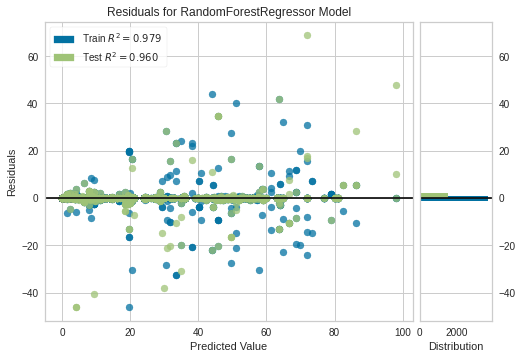

In [ ]:
plot_model(tuned_rf)

In [ ]:
interpret_model(tuned_rf)

SystemExit: ignored

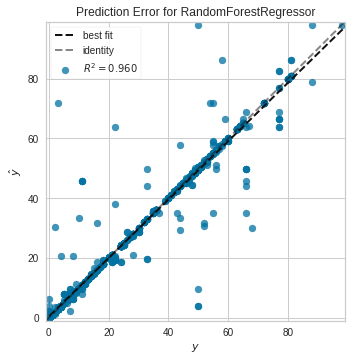

In [ ]:
plot_model(tuned_rf, plot = 'error')

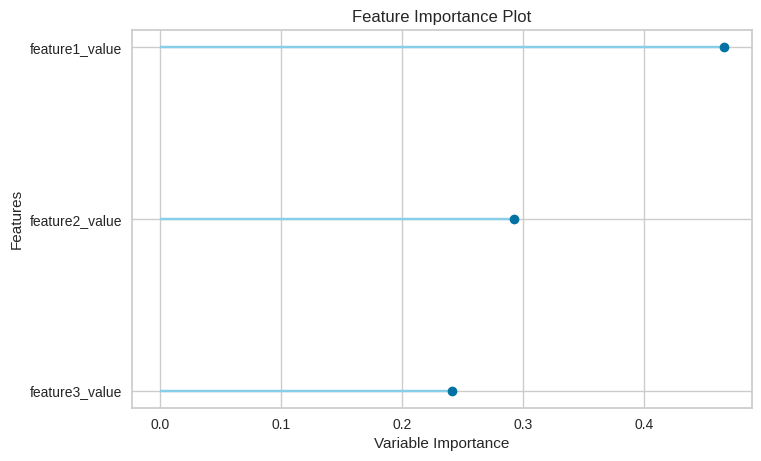

In [ ]:
plot_model(tuned_rf, plot='feature')

Finalize

In [ ]:
final_pycaret = finalize_model(tuned_rf)

Prediction

In [ ]:
test_dir = 'test/'

In [ ]:
test_file = os.listdir(test_dir)
df_map_test = pd.DataFrame(test_file, columns = ['map_id'])

In [ ]:
print(f'There are {len(df_map_test)} images in test set')

There are 4274 images in test set


In [ ]:
y_pred = []

for image in df_map_test['map_id']:
    x = Image.open(os.path.join(test_dir, image))
    x = np.array(image_preprocess(x))
    x = np.expand_dims(x, axis=0)
    x = np.vstack([x])/255.
    classes = model.predict(x)
    y_pred.append(np.argmax(classes, axis = 1)[0])

In [ ]:
df_map_test['category'] = y_pred

df_map_test.head()

,map_id,category
0,077dd2d4-b704-4bd4-a4cd-f26b90c3850e.png,6
1,7a69eb38-050f-4784-bd8f-b83ea70fb37b.png,4
2,05047911-1ac3-40e9-a8e2-8e6faad42b37.png,1
3,2a506ea1-2584-4619-8e23-68cd2c2eee31.png,5
4,18f29860-cf98-4ee8-b1cc-d22e84f9c3e5.png,8


Join Test Rules and Map

In [ ]:
df_test_rule.head()

,id,feature1,feature2,feature3,predict
0,5339e74f-56f2-48f1-bab2-59d5f8aa030a,NaN,72f260fb-5e89-4f99-928a-5db931c4eb65.png,f30827c8-f17e-4ab4-b668-9cae733819cd.png,NaN
1,b4ed46c8-4bcb-46c9-b8af-f833d4351849,NaN,72f260fb-5e89-4f99-928a-5db931c4eb65.png,f30827c8-f17e-4ab4-b668-9cae733819cd.png,NaN
2,09a42f96-dd78-499c-9772-b4be5bbf04f7,NaN,5f463395-957b-4b0f-b813-0494d75fa70c.png,feaa5a12-222c-4912-b68a-c8e4c5437a62.png,NaN
3,baeeeb75-2845-4d33-a099-d0e32ec48078,NaN,c6d635e1-e60e-4ad0-949e-d50d0cbc09b7.png,469661c1-aea7-435e-be79-51882f790ccc.png,NaN
4,e1d1881e-6273-4225-b5ca-3b91d79fe626,NaN,d21ea15d-582f-473c-b319-b3907bbca405.png,c4359d1d-80fb-4aae-8b76-8bcaf043ee24.png,NaN


In [ ]:
df_test_join = pd.merge(df_test_rule, df_map_test, how='left', left_on=['feature1'], right_on=['map_id'])\
            .rename(columns={'category':'feature1_value'}).drop(['feature1'],axis=1)

df_test_join = pd.merge(df_test_join.drop('map_id', axis = 1), df_map_test, how='left', left_on=['feature2'], right_on=['map_id'])\
            .rename(columns={'category':'feature2_value'}).drop(['map_id','feature2'],axis=1)

df_test_join = pd.merge(df_test_join, df_map_test, how='left', left_on=['feature3'], right_on=['map_id'])\
            .rename(columns={'category':'feature3_value'}).drop(['map_id','feature3'],axis=1)

In [ ]:
df_test_join.head()

,id,predict,feature1_value,feature2_value,feature3_value
0,5339e74f-56f2-48f1-bab2-59d5f8aa030a,NaN,NaN,9,1
1,b4ed46c8-4bcb-46c9-b8af-f833d4351849,NaN,NaN,9,1
2,09a42f96-dd78-499c-9772-b4be5bbf04f7,NaN,NaN,6,9
3,baeeeb75-2845-4d33-a099-d0e32ec48078,NaN,NaN,3,5
4,e1d1881e-6273-4225-b5ca-3b91d79fe626,NaN,NaN,7,9


In [ ]:
df_test_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20000 non-null  object 
 1   predict         0 non-null      float64
 2   feature1_value  3052 non-null   float64
 3   feature2_value  20000 non-null  int64  
 4   feature3_value  20000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 937.5+ KB


**Regression Prediction**

In [ ]:
# Rule Base

df_test_join_rule = df_test_join.drop('predict', axis = 1).dropna()
df_test_join_rule['predict'] = 0

for i in range(len(df_test_join_rule)):
    f1 = df_test_join_rule['feature1_value'].iloc[i]
    f2 = df_test_join_rule['feature2_value'].iloc[i]
    f3 = df_test_join_rule['feature3_value'].iloc[i]
    
    if f1 == 0:
        df_test_join_rule['predict'].iloc[i] = f2 * f3
    
    elif f1 == 1:
        df_test_join_rule['predict'].iloc[i] = np.abs(f2 - f3)
        
    elif f1 == 2:
        df_test_join_rule['predict'].iloc[i] = (f2 + f3) * np.abs(f2 - f3)
        
    elif f1 == 3:
        df_test_join_rule['predict'].iloc[i] = np.abs((f3 * (f3 + 1) - f2 * (f2 - 1))/2)
        
    elif f1 == 4:
        df_test_join_rule['predict'].iloc[i] = 50 + (f2 - f3)
        
    elif f1 == 5:
        df_test_join_rule['predict'].iloc[i] = min(f2,f3)
        
    elif f1 == 6:
        df_test_join_rule['predict'].iloc[i] = max(f2,f3)
        
    elif f1 == 7:
        df_test_join_rule['predict'].iloc[i] = ((f2 * f3) % 9) *11
        
    elif f1 == 8:
        df_test_join_rule['predict'].iloc[i] = (((f2 ** 2) + 1) * f2) + (f3 * (f3 + 1)) % 99
        
    elif f1 == 9:
        df_test_join_rule['predict'].iloc[i] = 50 + f2
        
    df_test_join_rule['predict'].iloc[i] = df_test_join_rule['predict'].iloc[i] % 99

In [ ]:
df_test_join_rule.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3052 entries, 10318 to 19998
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3052 non-null   object 
 1   feature1_value  3052 non-null   float64
 2   feature2_value  3052 non-null   int64  
 3   feature3_value  3052 non-null   int64  
 4   predict         3052 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 143.1+ KB


In [ ]:
df_test_join_ml = df_test_join[df_test_join['feature1_value'].isnull()]

In [ ]:
df_test_join_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16948 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              16948 non-null  object 
 1   predict         0 non-null      float64
 2   feature1_value  0 non-null      float64
 3   feature2_value  16948 non-null  int64  
 4   feature3_value  16948 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 794.4+ KB


In [ ]:
df_test_join_ml['feature1_value'] = df_test_join_ml['feature1_value'].fillna(10)

In [ ]:
df_test_join_ml.head()

,id,predict,feature1_value,feature2_value,feature3_value
0,5339e74f-56f2-48f1-bab2-59d5f8aa030a,NaN,10.0,9,1
1,b4ed46c8-4bcb-46c9-b8af-f833d4351849,NaN,10.0,9,1
2,09a42f96-dd78-499c-9772-b4be5bbf04f7,NaN,10.0,6,9
3,baeeeb75-2845-4d33-a099-d0e32ec48078,NaN,10.0,3,5
4,e1d1881e-6273-4225-b5ca-3b91d79fe626,NaN,10.0,7,9


In [ ]:
df_test_join_ml = predict_model(final_pycaret, data=df_test_join_ml.drop('predict', axis = 1))

In [ ]:
df_test_join_ml = df_test_join_ml.rename({'Label': 'predict'}, axis='columns')

In [ ]:
df_test_join_ml['predict'] = df_test_join_ml['predict'].apply(lambda x: np.round(x))

In [ ]:
df_test_join_ml

,id,feature1_value,feature2_value,feature3_value,predict
index,,,,,
0,5339e74f-56f2-48f1-bab2-59d5f8aa030a,10.0,9,1,9.0
1,b4ed46c8-4bcb-46c9-b8af-f833d4351849,10.0,9,1,9.0
2,09a42f96-dd78-499c-9772-b4be5bbf04f7,10.0,6,9,15.0
3,baeeeb75-2845-4d33-a099-d0e32ec48078,10.0,3,5,8.0
4,e1d1881e-6273-4225-b5ca-3b91d79fe626,10.0,7,9,15.0
...,...,...,...,...,...
19992,58a7b16f-ac68-43c6-9478-d1db2df01c6d,10.0,5,0,4.0
19994,c5ed1d3b-f2bd-4a46-ae02-1473104bc40d,10.0,8,6,14.0
19996,e1fd0fe1-ca87-4797-91c5-9147918ffb04,10.0,5,9,14.0


Union

In [ ]:
df_test_join_ml_union = pd.concat([df_test_join_rule, df_test_join_ml])

In [ ]:
df_test_join_ml_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 10318 to 19999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20000 non-null  object 
 1   feature1_value  20000 non-null  float64
 2   feature2_value  20000 non-null  int64  
 3   feature3_value  20000 non-null  int64  
 4   predict         20000 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 937.5+ KB


Result

In [ ]:
df_result = df_test_join_ml_union[['id','predict']]

In [ ]:
df_result.head()

,id,predict
10318,748aed78-18c9-4d06-8d29-38d139c0ab64,63.0
10333,e4849f64-a990-4c10-8d3c-701b9d058b1e,3.0
10360,180b08fa-c141-4430-a134-614b162726d1,5.0
10376,f4459397-2999-46ef-8f98-c8e312189211,20.0
10406,71637035-45dd-4f63-992f-19fc18b7d414,25.0


In [ ]:
df_result.to_csv('result.csv', index = False)